<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Machine_Learning_IU_Labs/blob/main/Lab6_self_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [2]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt


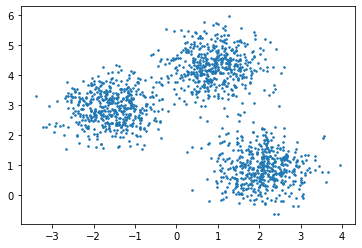

In [3]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

In [4]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# SVC model
svc_ovo = SVC(decision_function_shape='ovo') # ovo stands for one vs one
svc_ovo.fit(X,y)
svc_ovo_predict = svc_ovo.predict(X)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


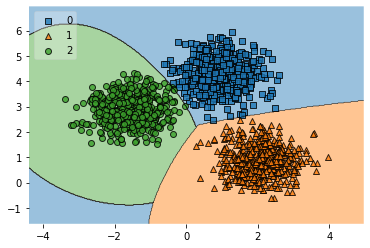

In [30]:
# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, svc_ovo_predict, clf=svc_ovo, legend=2)
plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


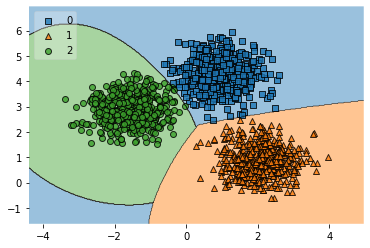

In [32]:
# SVC model
svc_ovr = SVC(decision_function_shape='ovr') # ovo stands for one vs one
svc_ovr.fit(X,y)
svc_ovr_predict = svc_ovr.predict(X)

# Plot decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, svc_ovo_predict, clf=svc_ovo, legend=2)
plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def kfold(model):
    # 5 k_folds
    kf = KFold(n_splits = 5)
    
    model = model

    # Evaluation of the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv = kf, n_jobs=-1)
 
    mean_score = np.mean(scores)
    
    # The performance i.e. Mean Classification acccuracy
    print(f"Mean Accuracy: {mean_score:.3f}%")
    print(f"\nStd. Deviation of Scores : {np.std(scores):.3f}")
 
    return mean_score

In [35]:
print(kfold(svc_ovo))
print(kfold(svc_ovr))

Mean Accuracy: 0.997%

Std. Deviation of Scores : 0.004
0.9966666666666667
Mean Accuracy: 0.997%

Std. Deviation of Scores : 0.004
0.9966666666666667
